In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("../data_sets/taitanic/train.csv")
test_data  = pd.read_csv("../data_sets/taitanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-v0_8-dark')

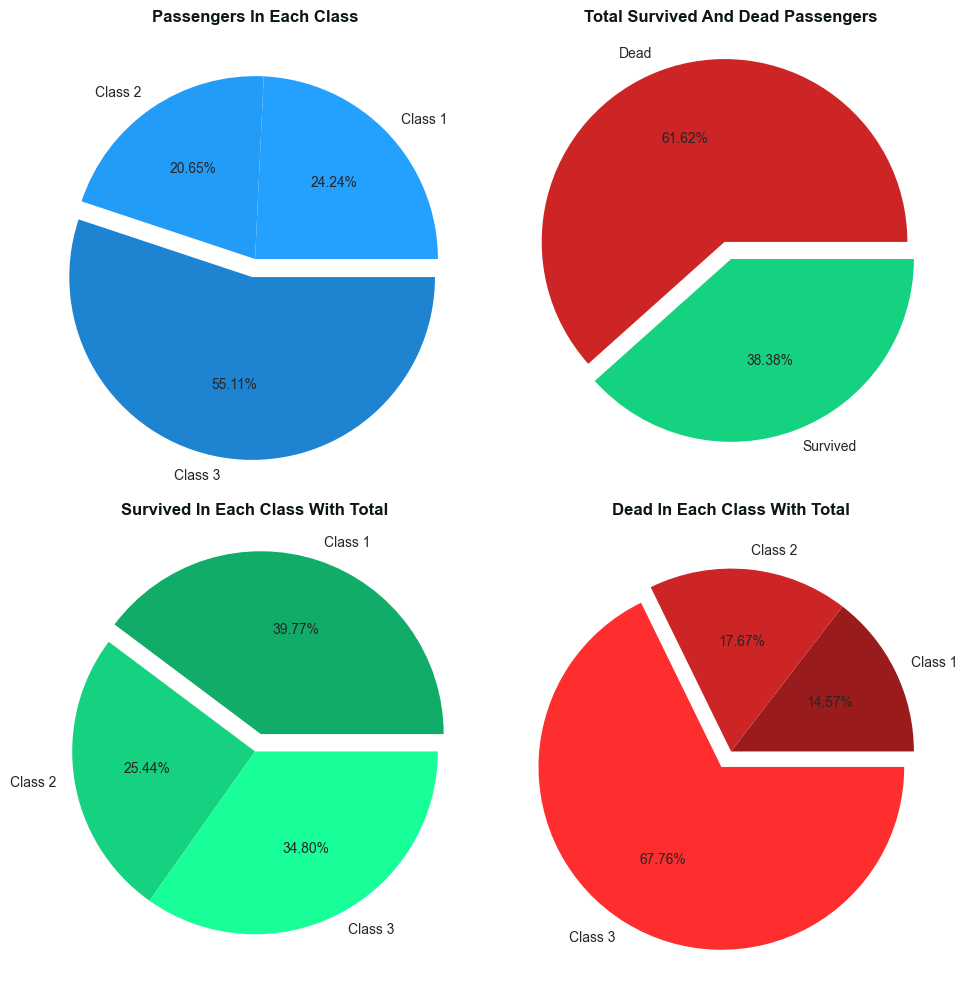

In [6]:
fig,ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].pie(
    train_data['Pclass'].value_counts().sort_index(),
    labels=['Class 1','Class 2','Class 3'],
    explode=[0,0,.1],
    autopct='%0.2f%%',
    pctdistance=.6,
    colors=['#24a0ff','#239cf8','#1e84d2'],
    )

ax[0,1].pie(
    train_data['Survived'].value_counts().sort_index(),
    labels=['Dead','Survived'],
    explode=[0.1,0],
    autopct='%0.2f%%',
    pctdistance=.6,
    colors=['#cd2525','#14d27f']
    )

ax[1,0].pie(
    train_data.Pclass[train_data.Survived == 1].value_counts().sort_index(),
    labels=['Class 1','Class 2','Class 3'],
    explode=[.1,0,0],
    autopct='%0.2f%%',
    pctdistance=.6,
    colors=['#11ac68','#14d27f','#18ff9a']
    )

ax[1,1].pie(
    train_data.Pclass[train_data.Survived == 0].value_counts().sort_index(),
    labels=['Class 1','Class 2','Class 3'],
    explode=[0,0,.1],
    autopct='%0.2f%%',
    pctdistance=.6,
    colors=['#9a1b1b','#cd2525','#ff2e2e']
    )

ax[0,0].set_title('Passengers In Each Class',fontsize=12,fontweight='bold',color='#0c1616')
ax[0,1].set_title('Total Survived And Dead Passengers',fontsize=12,fontweight='bold',color='#0c1616')
ax[1,0].set_title('Survived In Each Class With Total',fontsize=12,fontweight='bold',color='#0c1616')
ax[1,1].set_title('Dead In Each Class With Total',fontsize=12,fontweight='bold',color='#0c1616')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.tight_layout()
plt.show()

# Survived Passengers with total class Passengers In Each Class

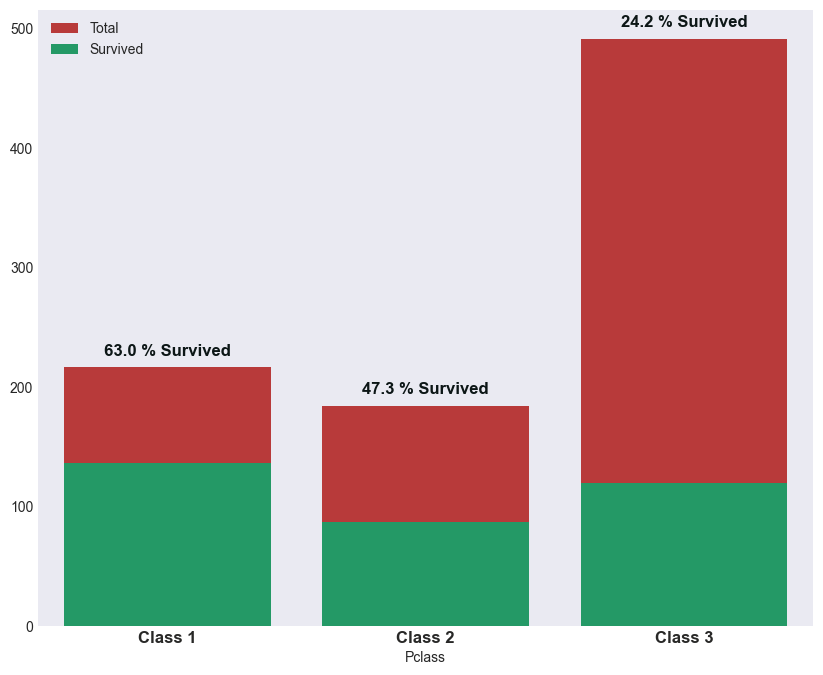

In [7]:
plt.figure(figsize=(10,8))
total_counts = train_data['Pclass'].value_counts().sort_index()
survived_counts = train_data.Pclass[train_data.Survived == 1].value_counts().sort_index()
percentage = survived_counts / total_counts
sns.barplot(
    x=total_counts.index,
    y=total_counts.values,
    color='#cd2525',
    label='Total'
    )
sns.barplot(
    x=survived_counts.index,
    y=survived_counts.values,
    color='#11ac68',
    label='Survived',
    )

for index, (pclass, per) in enumerate(percentage.items()):
    plt.text(
        x=index,
        y=total_counts[pclass] + 10,
        s=f'{per * 100:.1f} % Survived',
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='#0c1616', 
        )

plt.xticks(
    ticks=[0,1,2],
    labels=['Class 1','Class 2','Class 3'],
    fontsize=12,
    fontweight='bold',
    color='#282827', 
    )

plt.show()


C:\Users\osama\AppData\Local\Temp\ipykernel_17360\1991354783.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=sex_total_count[index] + 10,


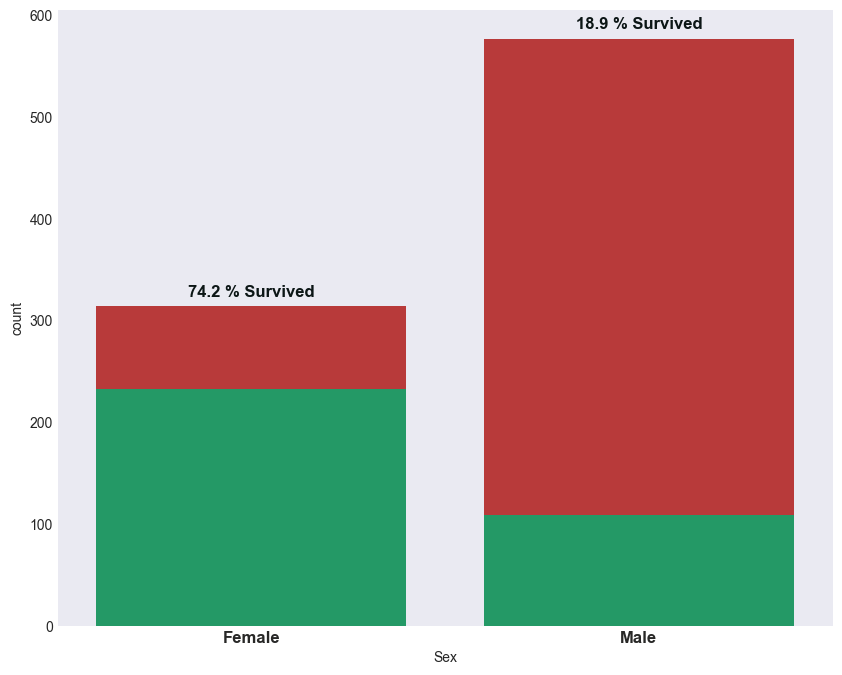

In [8]:
plt.figure(figsize=(10,8))

sex_total_count = train_data.Sex.value_counts().sort_index()
sex_survived_count = train_data.Sex[train_data.Survived == 1].value_counts().sort_index()

sex_per = sex_survived_count/sex_total_count

# print(sex_total_count)
# print(sex_survived_count)
# print(sex_per.values)

sns.barplot(
    data=sex_total_count,
    color='#cd2525',
    label='Dead'
    )

sns.barplot(
    data=sex_survived_count,
    color='#11ac68',
    label='Survived'
    )

for index, per in enumerate(sex_per.values):
    plt.text(
        x=index,
        y=sex_total_count[index] + 10,
        s=f'{per * 100:.1f} % Survived',
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='#0c1616', 
        )

plt.xticks(
    ticks=[0,1],
    labels=['Female','Male'],
    fontsize=12,
    fontweight='bold',
    color='#282827', 
    )

plt.show()


## so gender seems to be a strong indicator of survival

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
y = train_data.Survived
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
train_data.info()
train_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
features = ['Pclass','Sex','SibSp','Parch']

X = pd.get_dummies(train_data.loc[:,features])

X_test = pd.get_dummies(test_data.loc[:,features])

In [13]:
RandomForestClassifier_model = RandomForestClassifier(n_estimators=100,random_state=33,max_depth=3)
RandomForestClassifier_model.fit(X,y)

RandomForestClassifier(max_depth=3, random_state=33)

In [14]:
y_pred = RandomForestClassifier_model.predict(X_test)

In [15]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('../data_sets/taitanic/submission.csv',index=False)

In [16]:
y_test = pd.read_csv('../data_sets/taitanic/gender_submission.csv',usecols=[1])
# y_test['pred_Survived'] = y_pred
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


<Axes: >

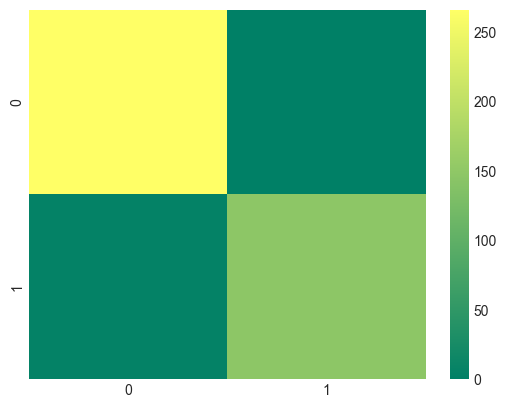

In [17]:
sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_pred),cmap='summer')

In [18]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       266
           1       1.00      0.97      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.99       418
weighted avg       0.99      0.99      0.99       418

